## For SOMfit paper, training SOM with BC03, cosmos colors
Last modified: May 7th, 2019 by Shooby

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import SOMPY as sompy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyfits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from matplotlib import gridspec
from matplotlib import ticker


def rms(a):
    return np.sqrt(np.mean(np.square(a)))
def abmag2fluxjk(mag):
    return (10**((mag-23.9)/(-2.5))/(10.0**6.0)) ##jansky

def mag2sollum(mag,redshift):
    fl=abmag2fluxjk(mag)*10**(-26.0) ##Watts/m2/hz
    v_wave=2520.
    v_freq=(299792458.0)/(v_wave*10.0**(-9.0))
    d=cosmo.luminosity_distance(redshift).value
    d=d*3.086e+22 ## MPC to meter
    lum=(1.0+redshift)**2.0*(fl)*v_freq*4.0*np.pi*(d**2.0) ## in watts
    return lum/(3.828*10**26)


cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)


In [3]:
redshift=1.0
catal=np.genfromtxt('All_mags_z1.0.cat',dtype=[('names', 'S50'), ('u', 'f8'), ('b', 'f8'), ('v', 'f8'), ('r', 'f8'),('i', 'f8'), ('z', 'f8'), ('y', 'f8'), ('j', 'f8'), ('h', 'f8'), ('k', 'f8'),('ch1', 'f8'), ('ch2', 'f8'), ('ch3', 'f8'), ('ch4', 'f8')])
    

ub=(catal['u']-catal['b'])
bv=(catal['b']-catal['v'])
vr=(catal['v']-catal['r'])
ri=(catal['r']-catal['i'])
iz=(catal['i']-catal['z'])
zy=(catal['z']-catal['y'])
yj=(catal['y']-catal['j'])
jh=(catal['j']-catal['h'])
hk=(catal['h']-catal['k'])
kc1=(catal['k']-catal['ch1'])
c1c2=(catal['ch1']-catal['ch2'])
c2c3=(catal['ch2']-catal['ch3'])
c3c4=(catal['ch3']-catal['ch4'])

ageo=[]
for bbb in range(len(catal['names'])):
    ageo.append(float(catal['names'][bbb][9:15]))
ageo=np.array(ageo)
selage=(ageo<=cosmo.age(redshift).value) 


def bordare_rang(redshift):
    catal=np.genfromtxt('All_mags_z1.0.cat',dtype=[('names', 'S50'), ('u', 'f8'), ('b', 'f8'), ('v', 'f8'), ('r', 'f8'),('i', 'f8'), ('z', 'f8'), ('y', 'f8'), ('j', 'f8'), ('h', 'f8'), ('k', 'f8'),('ch1', 'f8'), ('ch2', 'f8'), ('ch3', 'f8'), ('ch4', 'f8')])
    mass=np.genfromtxt('Mass_table_fromcsp.cat')
    met,age,tau,ebv,ml=np.zeros_like(catal['b']),np.zeros_like(catal['b']),np.zeros_like(catal['b']),np.zeros_like(catal['b']),np.zeros_like(catal['b']),
    uvj=np.zeros_like(catal['names'])
    for i in range(len(catal['names'])):
        met[i]=int(catal['names'][i][28:30])
        age[i]=float(catal['names'][i][9:15])
        tau[i]=float(catal['names'][i][19:24])
        ebv[i]=float(catal['names'][i][34:38])
        inja=(np.abs(mass[:,0]-tau[i])<=0.01)&(np.abs(mass[:,2]-(np.log10(10.0**9.0*np.float(age[i])))<=0.01))
        ml[i]=(np.median(mass[inja,7])) 
        if ~(((catal['r'][i]-catal['j'][i])>0.8*(catal['j'][i]-catal['k'][i])+0.7)&((catal['r'][i]-catal['j'][i])>1.3)&((catal['j'][i]-catal['k'][i])<1.5))&((catal['r'][i]-catal['j'][i])<1.5):
            uvj[i]='sb'
        elif ~(((catal['r'][i]-catal['j'][i])>0.8*(catal['j'][i]-catal['k'][i])+0.7)&((catal['r'][i]-catal['j'][i])>1.3)&((catal['j'][i]-catal['k'][i])<1.5))&((catal['r'][i]-catal['j'][i])>=1.5):
            uvj[i]='sd'
        else:
            uvj[i]='qg'

    ub=(catal['u']-catal['b'])
    bv=(catal['b']-catal['v'])
    vr=(catal['v']-catal['r'])
    ri=(catal['r']-catal['i'])
    iz=(catal['i']-catal['z'])
    zy=(catal['z']-catal['y'])
    yj=(catal['y']-catal['j'])
    jh=(catal['j']-catal['h'])
    hk=(catal['h']-catal['k'])
    kc1=(catal['k']-catal['ch1'])
    c1c2=(catal['ch1']-catal['ch2'])

    selage=(age<=cosmo.age(redshift).value)&(~np.isnan(ub))&(~np.isnan(bv))&(~np.isnan(vr))&(~np.isnan(ri))&(~np.isnan(iz))&(~np.isnan(zy))&(~np.isnan(yj))&(~np.isnan(jh))&(~np.isnan(hk))&(~np.isnan(kc1))&(~np.isnan(c1c2))
    dat=np.array([ub[selage],bv[selage],vr[selage],ri[selage],iz[selage],zy[selage],yj[selage],jh[selage],hk[selage],kc1[selage],c1c2[selage]])
    data=dat.T
    par=[met[selage],age[selage],tau[selage],ebv[selage],catal['ch2'][selage],uvj[selage]]
    return data,par

data,par=bordare_rang(redshift)
print (np.shape(data))

(13776, 11)


In [4]:
msz0 = 80
msz1 = 60
sm = sompy.SOMFactory.build(data, mapsize=[msz0,msz1], mapshape='planar', lattice='rect', initialization='pca') 
sm.train(n_job=4, shared_memory = 'no')

 Training...
 pca_linear_initialization took: 0.201000 seconds
 Rough training...
 radius_ini: 10.000000 , radius_final: 2.500000, trainlen: 11

 epoch: 1 ---> elapsed time:  4.381000, quantization error: 0.566656

 epoch: 2 ---> elapsed time:  1.622000, quantization error: 0.349187

 epoch: 3 ---> elapsed time:  0.591000, quantization error: 0.261534

 epoch: 4 ---> elapsed time:  0.530000, quantization error: 0.248670

 epoch: 5 ---> elapsed time:  0.625000, quantization error: 0.233962

 epoch: 6 ---> elapsed time:  0.772000, quantization error: 0.215724

 epoch: 7 ---> elapsed time:  0.842000, quantization error: 0.196221

 epoch: 8 ---> elapsed time:  0.815000, quantization error: 0.175656

 epoch: 9 ---> elapsed time:  1.084000, quantization error: 0.154962

 epoch: 10 ---> elapsed time:  0.636000, quantization error: 0.134837

 epoch: 11 ---> elapsed time:  0.586000, quantization error: 0.116643

 Finetune training...
 radius_ini: 2.500000 , radius_final: 1.000000, trainlen: 14


In [5]:
ndtype=[('id', "S15"), ('ra', float), ('dec', float),('ubc',float), ('bvc',float),('vrc',float), ('ric',float), 
        ('izc',float), ('zyc',float), ('yjc',float), ('jhc',float), ('hkc',float),('k1c',float), ('c12c',float),
        ('c23c',float),('c34c',float),('eub',float), ('ebv',float),('evr',float), ('eri',float), 
        ('eiz',float), ('ezy',float), ('eyj',float), ('ejh',float), ('ehk',float),('ekc',float), ('ec12',float),
        ('ec23',float),('ec34',float),('zc',float), ('massc',float), ('sfrc',float), ('agec',float), 
        ('ebvc',float), ('kmag',float),('ekmag',float), ('MU',float),('MV',float), ('MJ',float), ('overdensity',float),('env', "S15")]

cosmos=np.genfromtxt('cosmos_z1_color+env.cat',dtype=ndtype)

mub,mbv,mvr,mri,miz,mzy,myj,mjh,mhk,mk1,mc12=1.0,1.2,1.4,1.6,1.1,1.4,2.0,1.5,1.6,1.2,0.85
cub,cbv,cvr,cri,ciz,czy,cyj,cjh,chk,ck1,cc12=0.2,-0.4,0.1,-0.3,0.1,0.1,-0.2,0.2,-0.2,0.1,0.04

ra=np.array(cosmos['ra'])
dec=np.array(cosmos['dec'])

ubc=mub*np.array(cosmos['ubc'])+cub
bvc=mbv*np.array(cosmos['bvc'])+cbv
vrc=mvr*np.array(cosmos['vrc'])+cvr
ric=mri*np.array(cosmos['ric'])+cri
izc=miz*np.array(cosmos['izc'])+ciz
zyc=mzy*np.array(cosmos['zyc'])+czy
yjc=myj*np.array(cosmos['yjc'])+cyj
jhc=mjh*np.array(cosmos['jhc'])+cjh
hkc=mhk*np.array(cosmos['hkc'])+chk
k1c=mk1*np.array(cosmos['k1c'])+ck1
c12c=mc12*np.array(cosmos['c12c'])+cc12
eub=np.array(cosmos['eub'])
ebv=np.array(cosmos['ebv'])
evr=np.array(cosmos['evr'])
eri=np.array(cosmos['eri'])
eiz=np.array(cosmos['eiz'])
ezy=np.array(cosmos['ezy'])
eyj=np.array(cosmos['eyj'])
ejh=np.array(cosmos['ejh'])
ehk=np.array(cosmos['ehk'])
ekc=np.array(cosmos['ekc'])
ec12=np.array(cosmos['ec12'])


zc=np.array(cosmos['zc'])
massc=np.array(cosmos['massc'])
sfrc=np.array(cosmos['sfrc'])
agec=np.array(cosmos['agec'])
ebvc=np.array(cosmos['ebvc'])
kmag=np.array(cosmos['kmag'])
ekmag=np.array(cosmos['ekmag'])

dens=np.array(cosmos['overdensity'])
env=np.array(cosmos['env'])

13718


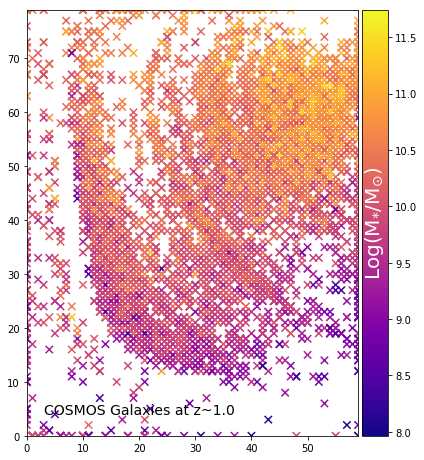

In [6]:
plt.figure(figsize=(6,6.5))
ax = plt.gca()

dat2=np.array([ubc,bvc,vrc,ric,izc,zyc,yjc,jhc,hkc,k1c,c12c])
data2=dat2.T
ac=sm.bmu_ind_to_xy(sm.project_data(data2))
xpz,ypz=np.zeros(len(ac)),np.zeros(len(ac))

k=0
for i in ac:
    xpz[k]=i[0]
    ypz[k]=i[1]
    k+=1

im=ax.scatter(ypz,xpz,c=massc,s=55,marker='x',cmap='plasma')
plt.text(3,4,'COSMOS Galaxies at z~'+str(redshift),size=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.05)
cb=plt.colorbar(im, cax=cax)
cb.set_label(r'$\rm Log(M_{*}/M_{\odot})$', labelpad=-55,size=20,color='w')
ax.set_xlim([0,msz1-1])
ax.set_ylim([0,msz0-1])
print len(data2)
plt.tight_layout()

plt.savefig('plots/Mass_onSOM.png')

In [13]:
from scipy.integrate import quad
def integrand(t, tau):
     return np.exp(-t/tau)

def ssfr(age,tau):
    I = quad(integrand, 0, age, args=(tau))[0]
    return np.log10(np.exp(-age/tau)/I)-9.0

mass=np.genfromtxt('Mass_table_fromcsp.cat')
data,par=bordare_rang(redshift)
a=sm.bmu_ind_to_xy(sm.project_data(data))

x,y,age,tau,ebv,mv,mk,met,ssf=np.zeros(len(a)),np.zeros(len(a)),np.zeros(len(a)),np.zeros(len(a)),np.zeros(len(a)),np.zeros(len(a)),np.zeros(len(a)),np.zeros(len(a)),np.zeros(len(a))
k=0
for i in a:
    x[k]=i[0]
    y[k]=i[1]
    met[k]=(par[0][k])
    age[k]=(par[1][k])
    tau[k]=(par[2][k])
    ebv[k]=(par[3][k])
    ssf[k]=ssfr(age[k],tau[k])
    for juj in range(len(mass[:,2])):
        if (np.abs(mass[juj,2]-np.log10(10.0**9.0*np.float(par[1][k])))<=0.01)&(np.abs(mass[juj,0]-par[2][k])<0.001):
            mk[k]=(mass[juj,7])
            
    k+=1
    
testr=np.zeros([msz0,msz1])
for i in range(msz0):
    for j in range(msz1):
        unja=(x==i)&(y==j)
        testr[i,j]=np.median(ebv[unja])

/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
print np.shape(ebv)

(13776,)


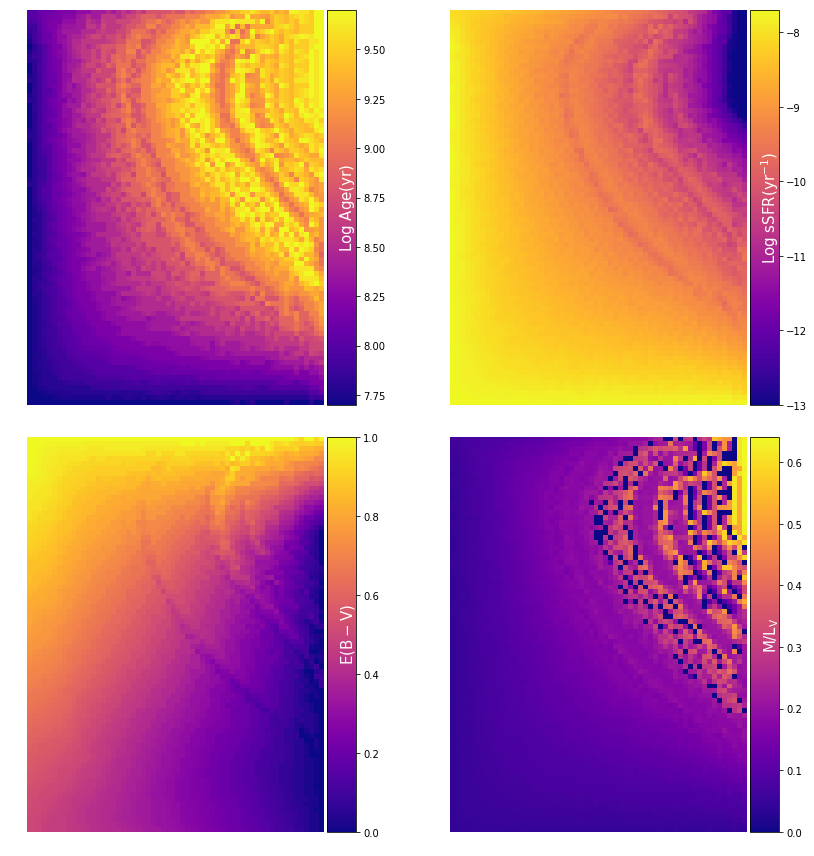

In [15]:
from scipy import interpolate
yi = np.linspace(np.min(x), np.max(x),msz0*1)
xi = np.linspace(np.min(y), np.max(y),msz1*1)
XI, YI = np.meshgrid(xi, yi)
points = np.vstack((y,x)).T
points = np.asarray(points)
plt.figure(figsize=(12,12))

values = np.asarray(age)
DEMage = interpolate.griddata(points, values, (XI,YI), method='linear')
plt.subplot(2,2,1)
ax = plt.gca()
im=ax.imshow(np.log10(DEMage*10.0**9),origin='lower',cmap='plasma')
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
cb=plt.colorbar(im, cax=cax)
cb.set_label(r'$\rm Log\ Age (yr)$', labelpad=-48,size=15,color='w')

values = np.asarray(ssf)
DEMtau = interpolate.griddata(points, values, (XI,YI), method='linear')
plt.subplot(2,2,2)
ax = plt.gca()
im=ax.imshow(DEMtau,vmin=-13,origin='lower',cmap='plasma')
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
cb=plt.colorbar(im, cax=cax)
cb.set_label(r'$\rm Log\ sSFR (yr^{-1})$', labelpad=-48,size=15,color='w')

values = np.asarray(ebv)
DEMebv = interpolate.griddata(points, values, (XI,YI), method='linear')
plt.subplot(2,2,3)
ax = plt.gca()
im=ax.imshow(DEMebv,origin='lower',cmap='plasma')
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
cb=plt.colorbar(im, cax=cax)
cb.set_label(r'$\rm E(B-V)$', labelpad=-40,size=15,color='w')

values = np.asarray(mk)
DEMmlr = interpolate.griddata(points, values, (XI,YI), method='linear')
plt.subplot(2,2,4)
ax = plt.gca()
im=ax.imshow(DEMmlr,origin='lower',cmap='plasma')

ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
cb=plt.colorbar(im, cax=cax)
cb.set_label(r'$\rm M/L_{V}$', labelpad=-40,size=15,color='w')
plt.tight_layout()
plt.savefig('plots/a.png')

In [23]:
sen = DEMage.reshape(4800,1)
khak = DEMebv.reshape(4800,1)
jerm = DEMmlr.reshape(4800,1)
setare = DEMtau.reshape(4800,1)

f = open('som_trained_80x60.cat','w+')
for boz in range(4800):
    colors = sm.codebook.matrix[boz]
    f.write(str(colors[0])+'\t'+str(colors[1])+'\t'+str(colors[2])+'\t'+str(colors[3])+'\t'+
           str(colors[4])+'\t'+str(colors[5])+'\t'+str(colors[6])+'\t'+str(colors[7])+'\t'+
           str(colors[8])+'\t'+str(colors[9])+'\t'+str(colors[10])+'\t'+str(sen[boz][0])+'\t'+
           str(khak[boz][0])+'\t'+str(setare[boz][0])+'\t'+str(jerm[boz][0])+'\n')
f.close()

stats	0.033	0.226	0.185	0.191


/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


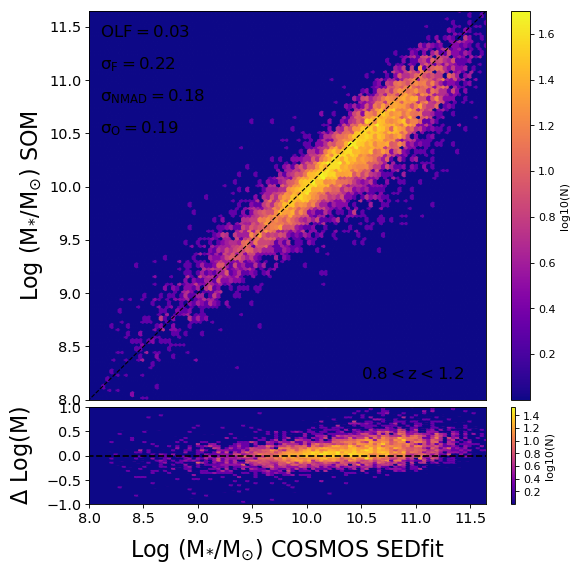

In [9]:
plt.style.use('default')

cos=np.genfromtxt('SOM_props_z1cosmos.cat')
m1=massc
m2=cos[:,5]

mass1=m1[np.isfinite(m2)&np.isfinite(m1)&(m2<13)]
mass2=m2[np.isfinite(m2)&np.isfinite(m1)&(m2<13)]
mcanhst2=np.array(mass1-mass2)
sel=(np.abs(mcanhst2) > 0.5)
olf=float(np.sum(sel))/len(sel)
sel=(np.abs(mcanhst2) <=0.5)
print 'stats'+'\t'+str(round(olf,3))+'\t'+str(round(rms(mcanhst2),3))+'\t'+str(round(1.48*np.median(np.abs(mcanhst2)),3))+'\t'+str(round(rms(mcanhst2[sel]),3))


fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(2, 1,height_ratios=[4,1],hspace=0.03) 

ax0 = plt.subplot(gs[0])
hb=ax0.hexbin(mass1,mass2,vmin=0.001, gridsize=100, bins='log', cmap='plasma')
cb = fig.colorbar(hb, ax=ax0)
cb.set_label('log10(N)')
ax0.set_ylabel(r'$\rm Log\ (M_{*}/M_{\odot}) \ SOM$',fontsize=20)
ax0.plot([4,12],[4,12],'k--',linewidth=1)
ax0.set_xlim([8,max(mass2)])
ax0.set_ylim([8,max(mass2)])
ax0.text(8.1,11.4,r'$\rm OLF = 0.03$',size=15,color='k')
ax0.text(8.1,11.1,r'$\rm \sigma _{F}=0.22$',size=15,color='k')
ax0.text(8.1,10.8,r'$\rm \sigma _{NMAD}=0.18$',size=15,color='k')
ax0.text(8.1,10.5,r'$\rm \sigma_O=0.19$',size=15,color='k')
ax0.text(10.5,8.2,r'$\rm 0.8<z<1.2$',size=15,color='k')

ax0.axes.get_xaxis().set_ticks([])
plt.tick_params(axis='both', which='major', labelsize=13)

ax2 = plt.subplot(gs[1])
ax2.set_xlabel(r'$\rm Log\ (M_{*}/M_{\odot})\ COSMOS\ SEDfit$',fontsize=20, labelpad=10)
ax2.set_ylabel(r'$\rm \Delta \ Log(M)$',fontsize=20,labelpad=10)
ax2.set_ylim([-0.5,0.5])
hb=ax2.hexbin(mass1,mcanhst2,vmin=0.001, gridsize=100, bins='log', cmap='plasma')
cb = fig.colorbar(hb, ax=ax2)
cb.set_label('log10(N)')
ax2.plot([6,12],[0,0],'k--')
ax2.set_xlim([8,max(mass2)])
ax2.set_ylim([-1.,1.])
ax2.yaxis.set_ticks([-1.0,-0.5,0.,0.5,1.0])
plt.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.savefig('plots/Mass_SOMvsSED.png')

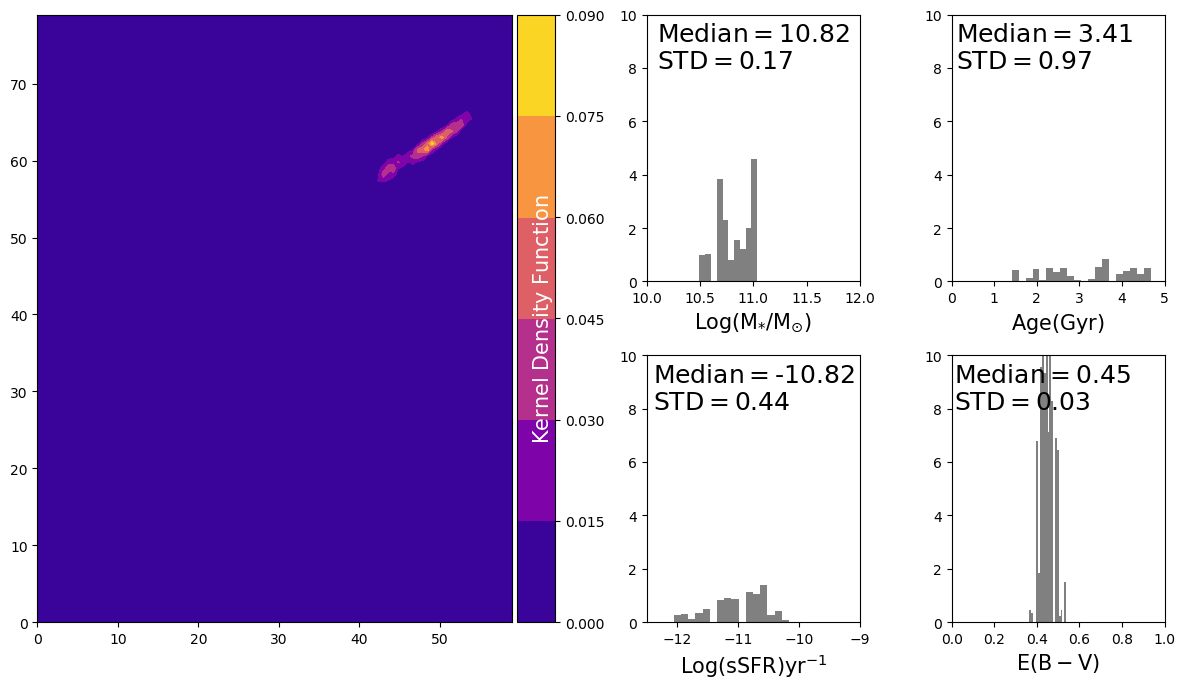

In [49]:
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec

#plt.style.use('dark_background')
plt.style.use('default')


def err_gen(iii,num):
    color = np.array([ubc[iii],bvc[iii],vrc[iii],ric[iii],izc[iii],zyc[iii],yjc[iii],jhc[iii],hkc[iii],k1c[iii],c12c[iii]])
    colerr = np.array([eub[iii],ebv[iii],evr[iii],eri[iii],eiz[iii],ezy[iii],eyj[iii],ejh[iii],ehk[iii],ekc[iii],ec12[iii]])
    newcol,kkmag = np.zeros([num,len(color)]),np.zeros(num)
    redshift = zc[iii]
    for j in range(num):
        for i in range(len(color)):
            newcol[j,i] = np.random.normal(color[i],colerr[i],1)
            kkmag[j] = np.random.normal(kmag[iii],ekmag[iii],1)
    
    dat2 = np.array([newcol[:,0],newcol[:,1],newcol[:,2],newcol[:,3],newcol[:,4],newcol[:,5],newcol[:,6],newcol[:,7],
             newcol[:,8],newcol[:,9],newcol[:,10]])
    da = dat2.T
    import time
    start = time.time()
    ac=sm.bmu_ind_to_xy(sm.project_data(da))
    end = time.time()
    time_took = (end - start)

    x,y=np.zeros(len(ac)),np.zeros(len(ac))
    k=0
    for i in ac:
        x[k]=i[0]
        y[k]=i[1]
        k+=1
    
    gmlr,gage,gssfr,gebv=[],[],[],[]
    for bozche in range(len(x)):
        m2l=DEMmlr[np.int(x[bozche]*10),np.int(y[bozche]*10)]
        lum=mag2sollum(kkmag[bozche],redshift)
        gmlr.append(np.log10(m2l*lum))
        gage.append(DEMage[np.int(x[bozche]*10),np.int(y[bozche]*10)])
        gssfr.append(DEMtau[np.int(x[bozche]*10),np.int(y[bozche]*10)])
        gebv.append(DEMebv[np.int(x[bozche]*10),np.int(y[bozche]*10)])
    
    fig=plt.figure(figsize=(12,7))
    gs=GridSpec(4,4) # 2 rows, 3 columns

    ax=fig.add_subplot(gs[0:4,0:2]) # First row, first column
    import scipy.stats as st
    xmin, xmax = 0, msz1
    ymin, ymax = 0,msz0
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([y, x])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    #f[f<0.0001]=0
    
    import matplotlib
    my_cmap = matplotlib.cm.get_cmap('plasma')
    my_cmap.set_under('w')

    
    cfset = ax.contourf(xx, yy, f,cmap=my_cmap,label='probab')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="8%", pad=0.05)
    cb=plt.colorbar(cfset, cax=cax)
    cb.set_label(r'$\rm Kernel\ Density\ Function$', labelpad=-53,size=15,color='w')

    #ax.axis('off')

    daha=color.T
    daha = daha.reshape(1, -1) 
    bc=sm.bmu_ind_to_xy(sm.project_data(daha))
    #ax.plot(bc[0][1],bc[0][0],'k.')
    ax.set_xlim([0,msz1-1])
    ax.set_ylim([0,msz0-1])
    
    ax1=fig.add_subplot(gs[0:2,2])
    ax1.hist(gmlr,bins=20,normed=True,color='gray')
    ax1.set_xlabel(r'$\rm Log(M_{*}/M_{\odot})$',fontsize=15)
    #ax1.plot([np.median(gmlr),np.median(gmlr)],[0,10],'r--')
    ax1.text(10.1,9,r'$\rm Median=$'+np.str(np.round(np.median(gmlr),2)),size=18)
    ax1.text(10.1,8,r'$\rm STD=$'+np.str(np.round(np.std(gmlr),2)),size=18)
    ax1.set_xlim([10,12])
    ax1.set_ylim([0,10])

    ax2=fig.add_subplot(gs[2:4,2])
    ax2.hist(gssfr,bins=20,normed=True,color='gray')
    ax2.set_xlabel(r'$\rm Log(sSFR) yr^{-1}$',fontsize=15)
    ax2.text(-12.4,9,r'$\rm Median=$'+np.str(np.round(np.median(gssfr),2)),size=18)
    ax2.text(-12.4,8,r'$\rm STD=$'+np.str(np.round(np.std(gssfr),2)),size=18)
    ax2.set_xlim([-12.5,-9])
    ax2.set_ylim([0,10])

    
    ax3=fig.add_subplot(gs[0:2,3])
    ax3.hist(gage,bins=20,normed=True,color='gray')
    ax3.set_xlabel(r'$\rm Age (Gyr)$',fontsize=15)
    #ax3.plot([np.median(gage),np.median(gage)],[0,10],'r--')
    ax3.text(0.1,9,r'$\rm Median=$'+np.str(np.round(np.median(gage),2)),size=18)
    ax3.text(0.1,8,r'$\rm STD=$'+np.str(np.round(np.std(gage),2)),size=18)
    ax3.set_xlim([0,5])
    ax3.set_ylim([0,10])


    ax4=fig.add_subplot(gs[2:4,3])
    ax4.hist(gebv,bins=20,normed=True,color='gray')
    ax4.set_xlabel(r'$\rm E(B-V)$',fontsize=15)
    ax4.set_xlim([0,1])
    ax4.set_ylim([0,10])
    ax4.text(0.01,9,r'$\rm Median=$'+np.str(np.round(np.median(gebv),2)),size=18)
    ax4.text(0.01,8,r'$\rm STD=$'+np.str(np.round(np.std(gebv),2)),size=18)
 
    #ax4.plot([np.median(gebv),np.median(gebv)],[0,10],'r--')
    
    plt.tight_layout()
    plt.savefig('plots/galaxy_id'+str(iii)+'_onSOM.png')
    
    p=[bc[0][1],bc[0][0],np.median(gmlr),np.std(gmlr),np.median(gssfr),np.std(gssfr),np.median(gage),np.std(gage),np.median(gebv),np.std(gebv),time_took]
    return p

b=err_gen(43,1000)


In [17]:
def err_gen2(iii,num):
    color=np.array([ubc[iii],bvc[iii],vrc[iii],ric[iii],izc[iii],zyc[iii],yjc[iii],jhc[iii],hkc[iii],k1c[iii],c12c[iii]])
    colerr=np.array([eub[iii],ebv[iii],evr[iii],eri[iii],eiz[iii],ezy[iii],eyj[iii],ejh[iii],ehk[iii],ekc[iii],ec12[iii]])
    newcol,kkmag=np.zeros([num,len(color)]),np.zeros(num)
    redshift=zc[iii]
    for j in range(num):
        for i in range(len(color)):
            newcol[j,i]=np.random.normal(color[i],colerr[i],1)
            kkmag[j]=np.random.normal(kmag[iii],ekmag[iii],1)
    
    dat2=np.array([newcol[:,0],newcol[:,1],newcol[:,2],newcol[:,3],newcol[:,4],newcol[:,5],newcol[:,6],newcol[:,7],
             newcol[:,8],newcol[:,9],newcol[:,10]])
    da=dat2.T
    import time
    start = time.time()
    ac=sm.bmu_ind_to_xy(sm.project_data(da))
    end = time.time()
    time_took = (end - start)
    return time_took

x_t = 10**np.linspace(1,7,7)
y_t=[]
for boz in x_t:
    y_t.append(err_gen2(9,np.int(boz)))

In [45]:
x_t = [1.e+1, 1.e+2, 1.e+3, 1.e+4, 1.e+5, 1.e+6, 1.e+7]
y_t = [0.011531829833984375, 0.01317286491394043, 0.06246519088745117, 0.5592391490936279, 5.884165048599243, 59.200119972229004, 627.2678780555725]

x_sed = [10,100,1000,10000,100000,1000000]
y_sed = [5,42,390,3820,32000,400000]

x_g = [10,100,1000,10000,100000,1000000,10000000]
y_g = [1.814365e-05,4.076958e-05,4.582405e-04,1.178980e-03,1.392794e-02,1.295846e+00,7.85243e+00]

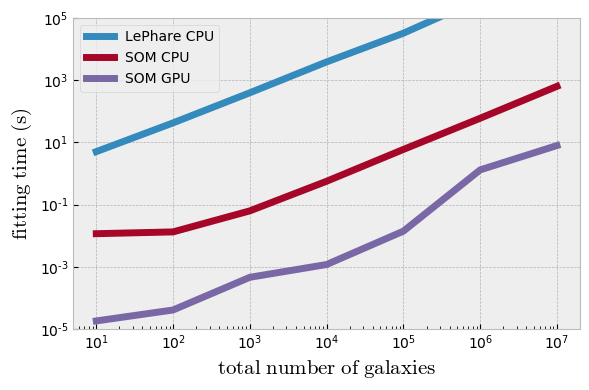

In [50]:

plt.style.use('bmh')
#plt.style.use('seaborn')
plt.figure(figsize=(6,4))

plt.plot(x_sed,y_sed,'-',label='LePhare CPU',linewidth=5)
plt.plot(x_t,y_t,'-',label='SOM CPU',linewidth=5)
plt.plot(x_g,y_g,'-',label='SOM GPU',linewidth=5)



plt.legend(loc=2)
plt.xscale('log')
plt.yscale('log')

#plt.xlim([0.0,10**7])
plt.ylim([10**-5,10**5])

plt.xlabel(r'$\rm total\ number\ of\ galaxies$',size=15)
plt.ylabel(r'$\rm fitting\ time\ (s)$',size=15)
plt.tight_layout()
plt.savefig('plots/speed.png')

In [18]:
print kmag[9],kmag[42],kmag[51]
print massc[9],massc[42],massc[51]
print ra[9],ra[42],ra[51]
print dec[9],dec[42],dec[51]


22.9766 21.7919 21.3404
8.97731 9.57961 10.506
150.128055517 149.885204898 150.00187859
1.61672805268 1.6209075897 1.62292178692


In [ ]:
10:26 1000
11:26
    